# Loading Standard Datasets with `torchvision`

---

This notebook extends the discussion on **data pipelines** from Chapter 12 by demonstrating how to use PyTorch's specialized library, **`torchvision`**, to easily access and manage common public image datasets.

This functionality builds directly on the foundational **`torch.utils.data.Dataset`** structure covered in the book.

### Key Topics Explored:

* **Loading Standard Datasets:** Utilizing `torchvision.datasets` to download and initialize popular datasets like **CelebA** and **MNIST**.
* **Dataset Verification:** Confirming that the loaded objects are instances of `torch.utils.data.Dataset`.
* **Data Inspection:** Accessing and printing individual data points from the dataset (e.g., checking image tensors and label attributes).
* **Visualization:** Using `matplotlib` to plot and visualize samples from the **MNIST** dataset to confirm successful loading and preprocessing of the image data.

This notebook is a practical step toward building the full Convolutional Neural Networks (CNNs) covered in later chapters, as it establishes the necessary input pipeline for image data.

In [11]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt

In [9]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split= 'train', target_type= 'attr', download= False
)
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [10]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x1D9BEE9E790>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


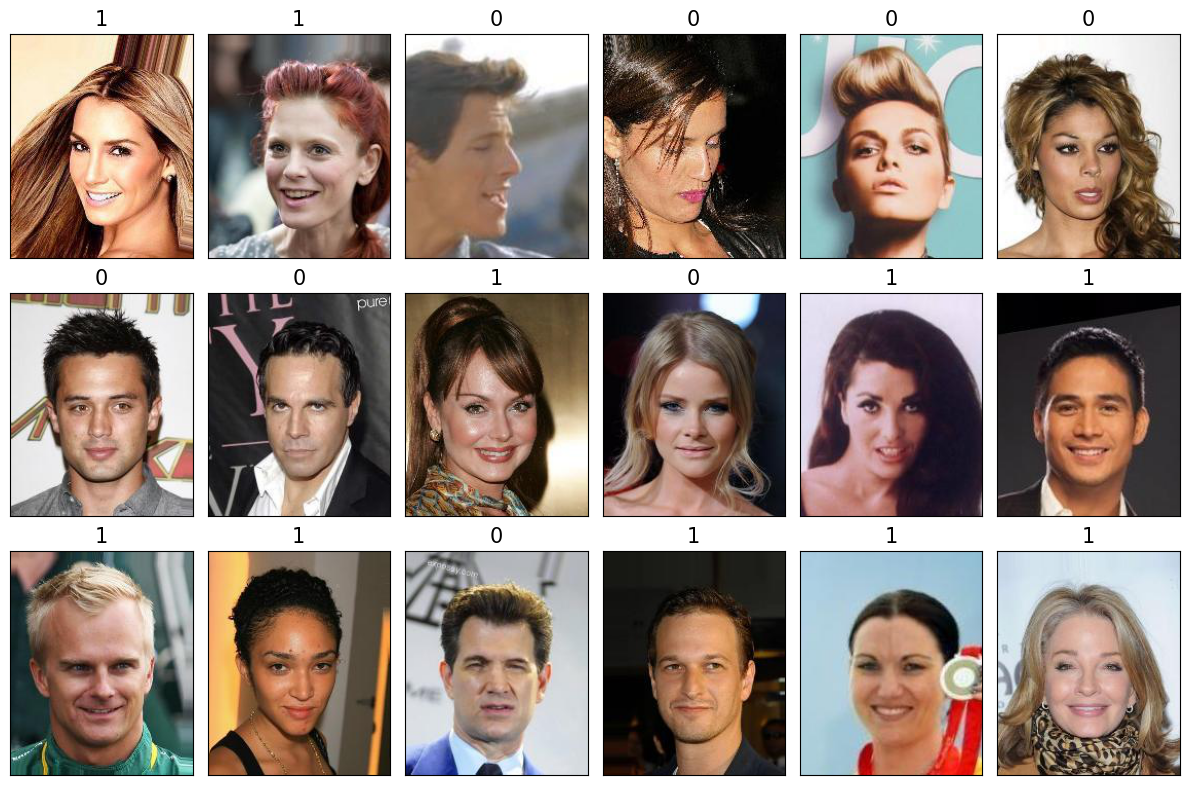

In [12]:
from itertools import islice
fig = plt.figure(figsize= (12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size= 15)
plt.tight_layout()
plt.show()

In [14]:
mnist_dataset = torchvision.datasets.MNIST(
    image_path, 'train', download= True
)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:18<00:00, 526kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 55.2kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 907kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 166kB/s]


In [16]:
ex = next(iter(mnist_dataset))
print(ex)

(<PIL.Image.Image image mode=L size=28x28 at 0x1D9C4FDA9D0>, 5)


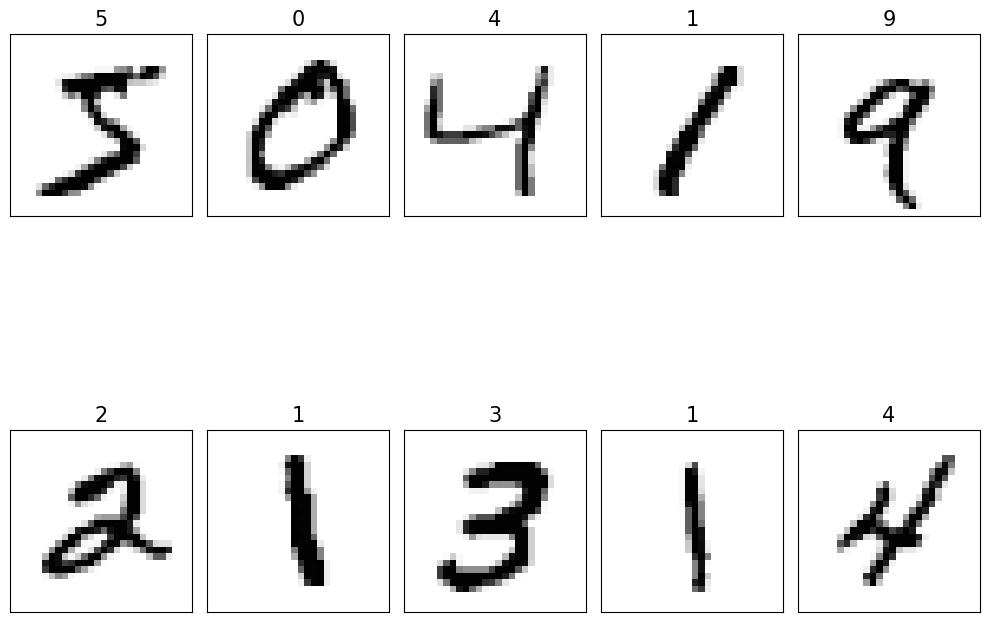

In [22]:
fig = plt.figure(figsize= (10, 10))
for i, (image, label) in islice(enumerate(mnist_dataset, 1), 10):
    ax = fig.add_subplot(2, 5, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap= 'Greys')
    ax.set_title(f'{label}', size= 15)
    
plt.tight_layout()
plt.show()